# Similarities and Differences of Top vs. Bottom 20% (Pt.1 - Age, Gender, Won/Lost Amount)

In [1]:
# Define libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates
import os

# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/2_June")


## General Overview

### Players, Visits, Sessions of Each Group

In [2]:

# Read in data
df_bottom_20 = pd.read_parquet("Bottom_20_gambles.parquet")
df_top_20 = pd.read_parquet("Top_20_gambles.parquet")
print('--------------------------------------------------')

# Eliminate players who maximum number of gambles is 1
df_bottom_20 = df_bottom_20.groupby('playerkey').filter(lambda x: x['gambles'].nunique() > 1)
df_top_20 = df_top_20.groupby('playerkey').filter(lambda x: x['gambles'].nunique() > 1)


# Number of gamblers
print("Number of gamblers in bottom 20%:", len(df_bottom_20['playerkey'].unique()))
print("Number of gamblers in top 20%:", len(df_top_20['playerkey'].unique()))
print('--------------------------------------------------')

# Print number of unique visits
print("Number of unique visits in bottom 20%:", len(df_bottom_20['visit'].unique()))
print("Number of unique visits in top 20%:", len(df_top_20['visit'].unique()))
print('--------------------------------------------------')

# Print number of unique sessions
print("Number of unique sessions in bottom 20%:", len(df_bottom_20['session_time'].unique()))
print("Number of unique sessions in top 20%:", len(df_top_20['session_time'].unique()))
print('--------------------------------------------------')

# Print number of unique sessions on session_machine
print("Number of unique sessions on session_machine in bottom 20%:", len(df_bottom_20['session_machine'].unique()))
print("Number of unique sessions on session_machine in top 20%:", len(df_top_20['session_machine'].unique()))




--------------------------------------------------
Number of gamblers in bottom 20%: 56
Number of gamblers in top 20%: 57
--------------------------------------------------
Number of unique visits in bottom 20%: 1
Number of unique visits in top 20%: 1
--------------------------------------------------
Number of unique sessions in bottom 20%: 2
Number of unique sessions in top 20%: 6
--------------------------------------------------
Number of unique sessions on session_machine in bottom 20%: 6
Number of unique sessions on session_machine in top 20%: 436


### Rank Differences

In [3]:
# For every unique rank, print the number of unique players
print('--------------------------------------------------')
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('rank')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('rank')['playerkey'].nunique())
print('--------------------------------------------------')

--------------------------------------------------
Number of unique players in bottom 20%:
rank
1.0    37
2.0     2
3.0     4
6.0    13
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
rank
1.0    30
2.0     8
3.0     5
6.0    14
Name: playerkey, dtype: int64
--------------------------------------------------


### Gender Differences

In [4]:
# Gender differences
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('gender')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('gender')['playerkey'].nunique())
print('--------------------------------------------------')

Number of unique players in bottom 20%:
gender
F    21
M    35
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
gender
F    25
M    32
Name: playerkey, dtype: int64
--------------------------------------------------


### Age Differences

In [5]:
# Create age ranges 
bins = [0, 24, 40, 55, 75, 150]
labels = ['18-24', '25-40', '41-55', '56-75', '76+']
generations = ['Gen Z', 'Millenials', 'Gen X', 'Baby Boomers', 'Silent']

# Use cut function to create age ranges for bottom 20% and top 20%
df_bottom_20['age_range'] = pd.cut(df_bottom_20['age'], bins=bins, labels=labels, right=False)
df_bottom_20['age_gen'] = pd.cut(df_bottom_20['age'], bins=bins, labels=generations, right=False)

df_top_20['age_range'] = pd.cut(df_top_20['age'], bins=bins, labels=labels, right=False)
df_top_20['age_gen'] = pd.cut(df_top_20['age'], bins=bins, labels=generations, right=False)

In [6]:
# Age range differences
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')

Number of unique players in bottom 20%:
age_range
18-24     0
25-40    20
41-55    19
56-75    14
76+       3
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
age_range
18-24     0
25-40     9
41-55    21
56-75    25
76+       2
Name: playerkey, dtype: int64
--------------------------------------------------


Number of unique players in bottom 20%:
age_gen
Gen Z            0
Millenials      20
Gen X           19
Baby Boomers    14
Silent           3
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
age_gen
Gen Z            0
Millenials       9
Gen X           21
Baby Boomers    25
Silent           2
Name: playerkey, dtype: int64
--------------------------------------------------


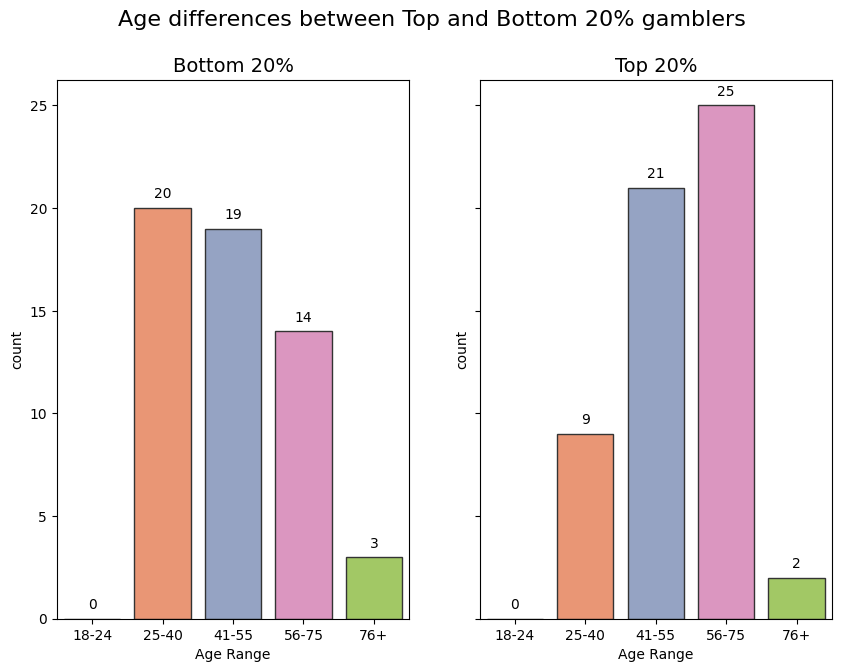

In [7]:
# Age generation differences
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('age_gen')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('age_gen')['playerkey'].nunique())
print('--------------------------------------------------')

# Unique list of players
u_count_top = df_top_20.groupby(['age_range'])['playerkey'].nunique().reset_index(name='count')
u_count_bot = df_bottom_20.groupby(['age_range'])['playerkey'].nunique().reset_index(name='count')

# Create figure to plot these differences
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 7))
fig.suptitle('Age differences between Top and Bottom 20% gamblers', fontsize=16)

# Plot top 20% gamblers
sns.barplot(x='age_range', y='count', data=u_count_top, ax=ax[1], palette="Set2", edgecolor=".2")
ax[1].set_title('Top 20%', fontsize=14)
ax[1].set_xlabel('Age Range')

# Display whole values (no decimals) on center top of bars
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

# Plot bottom 20% gamblers
sns.barplot(x='age_range', y='count', data=u_count_bot, ax=ax[0], palette="Set2", edgecolor=".2")
ax[0].set_title('Bottom 20%', fontsize=14)
ax[0].set_xlabel('Age Range')

# Display whole values (no decimals) on center top of bars
for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')



Male age differences in bottom 20%:
age_range
18-24     0
25-40    12
41-55    12
56-75     8
76+       3
Name: playerkey, dtype: int64
--------------------------------------------------
Female age differences in bottom 20%:
age_range
18-24    0
25-40    8
41-55    7
56-75    6
76+      0
Name: playerkey, dtype: int64


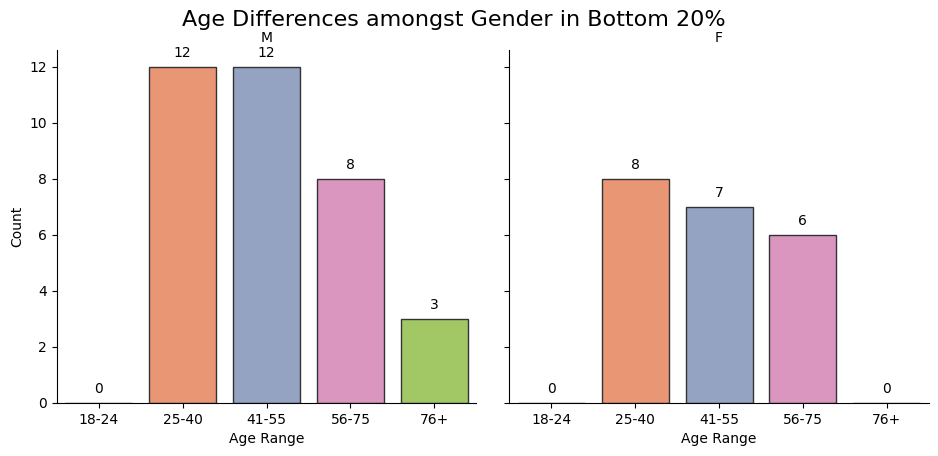

In [8]:
# Age range of male gamblers in bottom 20%
print("Male age differences in bottom 20%:")
print(df_bottom_20[df_bottom_20['gender'] == 'M'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
# Age range of Female gamblers in bottom 20%
print('Female age differences in bottom 20%:')
print(df_bottom_20[df_bottom_20['gender'] == 'F'].groupby('age_range')['playerkey'].nunique())

# Plotting age difference based on Gender in bottom 20%
unique_count = df_bottom_20.groupby(['age_range', 'gender'])['playerkey'].nunique().reset_index(name='count')
g = sns.FacetGrid(unique_count, col="gender", col_order=['M', 'F'])
g.map(sns.barplot, "age_range", "count", order=['18-24', '25-40', '41-55', '56-75', '76+'], edgecolor=".2", palette="Set2")
g.set_axis_labels("Age Range", "Count")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
# Display whole values (no decimals) on center top of bars
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Set figure title
g.fig.suptitle('Age Differences amongst Gender in Bottom 20%', fontsize=16)
# Make figure bigger
g.fig.set_size_inches(10, 5)
plt.show()


Male age differences in top 20%:
age_range
18-24     0
25-40     8
41-55    11
56-75    12
76+       1
Name: playerkey, dtype: int64
--------------------------------------------------
Female age differences in top 20%:
age_range
18-24     0
25-40     1
41-55    10
56-75    13
76+       1
Name: playerkey, dtype: int64
--------------------------------------------------


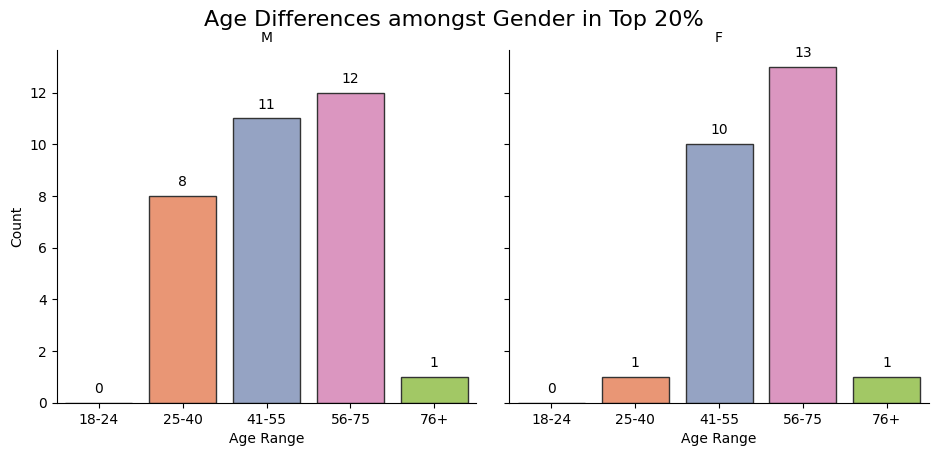

In [9]:
# Age range of male gamblers in top 20%
print("Male age differences in top 20%:")
print(df_top_20[df_top_20['gender'] == 'M'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
# Age range of female gamblers in top 20%
print("Female age differences in top 20%:")
print(df_top_20[df_top_20['gender'] == 'F'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')

# Plotting age difference based on Gender in top 20%
# Plotting age difference based on Gender in bottom 20%
unique_count_top = df_top_20.groupby(['age_range', 'gender'])['playerkey'].nunique().reset_index(name='count')
g = sns.FacetGrid(unique_count_top, col="gender", col_order=['M', 'F'])
g.map(sns.barplot, "age_range", "count", order=['18-24', '25-40', '41-55', '56-75', '76+'], edgecolor=".2", palette="Set2")
g.set_axis_labels("Age Range", "Count")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
# Display whole values (no decimals) on center top of bars
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Set figure title
g.fig.suptitle('Age Differences amongst Gender in Top 20%', fontsize=16)
# Make figure bigger
g.fig.set_size_inches(10, 5)
plt.show()

### Wealth Differences
#### General

Total amount won or lost by all players in bottom 20%:
-942.56006
Average amount won or lost by each player in bottom 20%:
-16.83
-------------------------------------------------------
Total amount won or lost by all players in top 20%:
244.61035
Average amount won or lost by each player in top 20%:
4.29


Text(0.5, 0, 'Ending Balance')

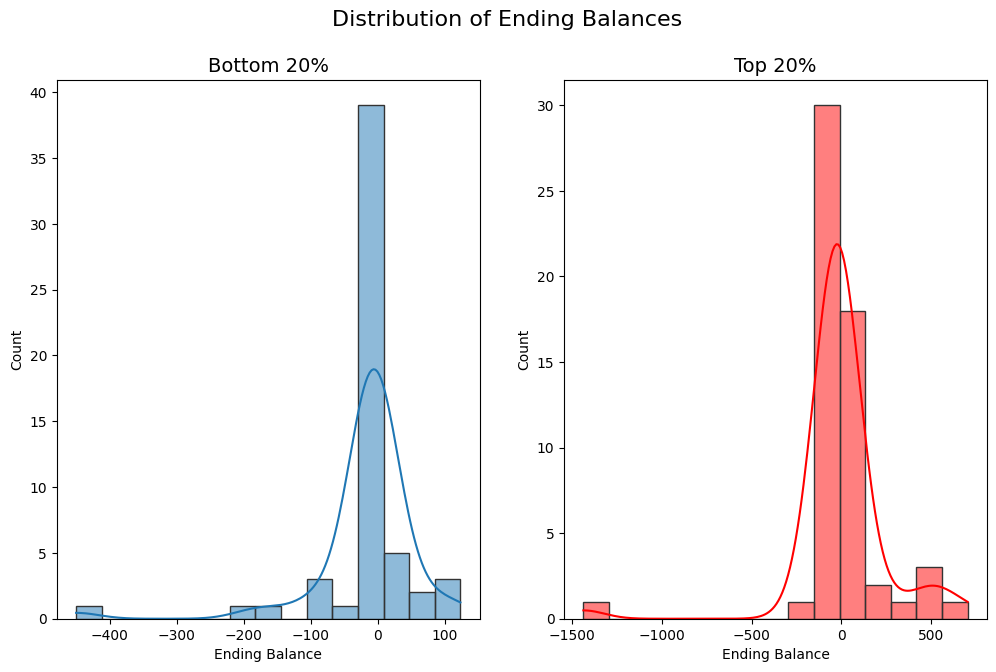

In [10]:
# Total amoun lost or won by all players in bottom 20%
# Group by 'playerkey'
grouped_b = df_bottom_20.groupby('playerkey')

# Calculate the amount won or lost by each player
b_amount_won_lost_each = grouped_b['playercashableamt'].last() - grouped_b['playercashableamt'].first()

# Calculate the total amount won or lost by all players
b_amount_won_lost_total = grouped_b['playercashableamt'].last().sum() - grouped_b['playercashableamt'].first().sum()

# Calculate average amount won or lost by each player
b_amount_won_lost_avg = b_amount_won_lost_total / len(grouped_b)

# Total amoun lost or won by all players in top 20%
# Group by 'playerkey'
grouped_t = df_top_20.groupby('playerkey')

# Calculate the amount won or lost by each player
t_amount_won_lost_each = grouped_t['playercashableamt'].last() - grouped_t['playercashableamt'].first()

# Calculate the total amount won or lost by all players
t_amount_won_lost_total = grouped_t['playercashableamt'].last().sum() - grouped_t['playercashableamt'].first().sum()

# Calculate average amount won or lost by each player
t_amount_won_lost_avg = t_amount_won_lost_total / len(grouped_t)

# Prin Results
print('Total amount won or lost by all players in bottom 20%:')
print(b_amount_won_lost_total)
print('Average amount won or lost by each player in bottom 20%:')
print(round(b_amount_won_lost_avg, 2))
print('-------------------------------------------------------')
print('Total amount won or lost by all players in top 20%:')
print(t_amount_won_lost_total)
print('Average amount won or lost by each player in top 20%:')
print(round(t_amount_won_lost_avg, 2))

# Create figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
# Set Title
fig.suptitle('Distribution of Ending Balances', fontsize=16)
# Plot histogram of amount won or lost by all players in bottom 20%
sns.histplot(b_amount_won_lost_each, ax=ax[0], bins=15, kde=True, edgecolor=".2")
ax[0].set_title('Bottom 20%', fontsize=14)
ax[0].set_xlabel('Ending Balance')

# Plot histogram of amount won or lost by all players in top 20%
sns.histplot(t_amount_won_lost_each, ax=ax[1], bins=15, kde=True, edgecolor=".2", color='red')
ax[1].set_title('Top 20%', fontsize=14)
ax[1].set_xlabel('Ending Balance')


#### Per Visit

In [11]:
# Group by 'playerkey' and visit
grouped_b_v = df_bottom_20.groupby(['playerkey', 'gender', 'age_range', 'age_gen', 'visit'])

# Calculate the amount won or lost by each player
b_amount_won_lost_each_v = grouped_b_v['playercashableamt'].last() - grouped_b_v['playercashableamt'].first()

print('Total amount won or lost in each visit bottom 20%:')
print(b_amount_won_lost_each_v.groupby('visit').sum())
print('-------------------------------------------------------')
print('Total amount won or lost for each gender in bottom 20%:')
print(b_amount_won_lost_each_v.groupby('gender').sum())
print('-------------------------------------------------------')
print('Total amount won or lost for each age range in bottom 20%:')
print(b_amount_won_lost_each_v.groupby('age_range').sum())


Total amount won or lost in each visit bottom 20%:
visit
1   -942.559998
Name: playercashableamt, dtype: float32
-------------------------------------------------------
Total amount won or lost for each gender in bottom 20%:
gender
F    -59.629997
M   -882.929993
Name: playercashableamt, dtype: float32
-------------------------------------------------------
Total amount won or lost for each age range in bottom 20%:
age_range
18-24      0.000000
25-40   -754.280029
41-55   -212.529999
56-75    -42.149998
76+       66.400002
Name: playercashableamt, dtype: float32


In [12]:
# Group by 'playerkey' and visit
grouped_t_v = df_top_20.groupby(['playerkey', 'gender', 'age_range', 'age_gen', 'visit'])

# Calculate the amount won or lost by each player
t_amount_won_lost_each_v = grouped_t_v['playercashableamt'].last() - grouped_t_v['playercashableamt'].first()

print('Total amount won or lost in each visit top 20%:')
print(t_amount_won_lost_each_v.groupby('visit').sum())
print('-------------------------------------------------------')
print('Total amount won or lost for each genter in top 20%:')
print(t_amount_won_lost_each_v.groupby('gender').sum())
print('-------------------------------------------------------')
print('Total amount won or lost for each age range in top 20%:')
print(t_amount_won_lost_each_v.groupby('age_range').sum())

Total amount won or lost in each visit top 20%:
visit
1    244.609848
Name: playercashableamt, dtype: float32
-------------------------------------------------------
Total amount won or lost for each genter in top 20%:
gender
F   -1116.820068
M    1361.429932
Name: playercashableamt, dtype: float32
-------------------------------------------------------
Total amount won or lost for each age range in top 20%:
age_range
18-24       0.000000
25-40    -212.350006
41-55   -1317.210083
56-75    1752.170044
76+        22.000000
Name: playercashableamt, dtype: float32


##### Distribution Ending Balances

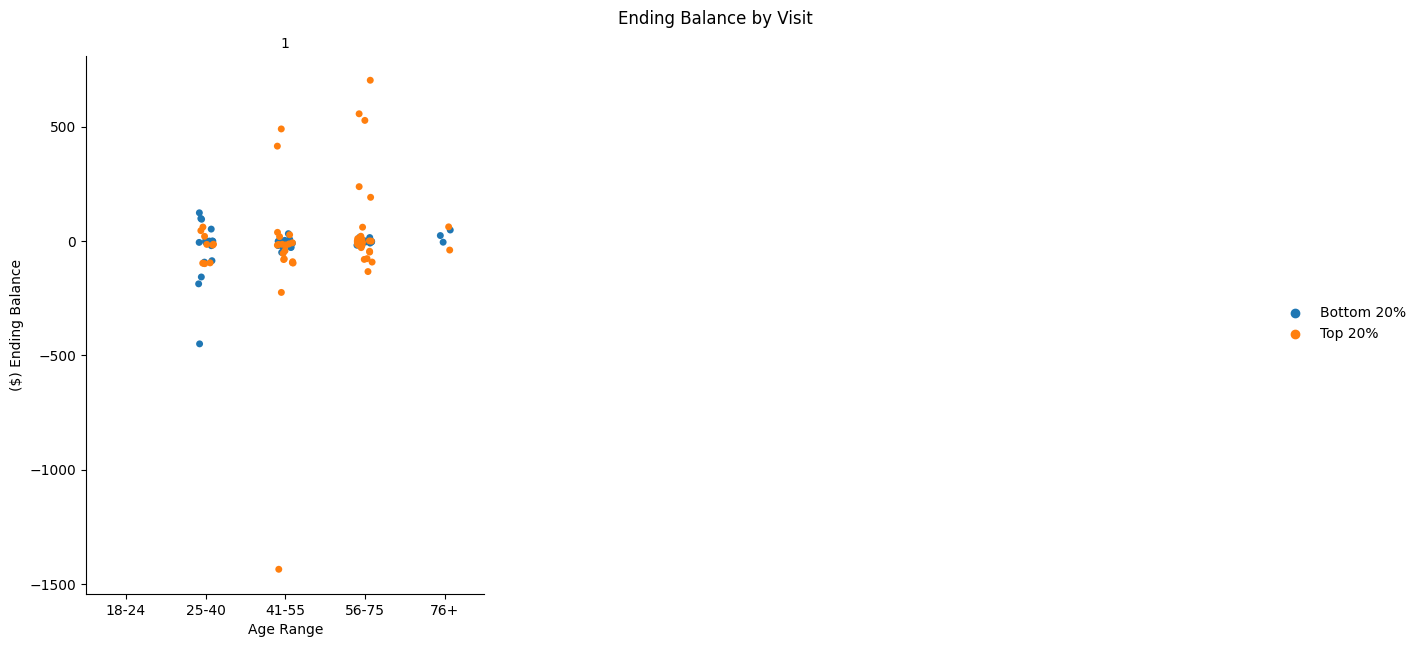

In [13]:
# Create dataframe with 'playerkey', 'visit', and 'ending_balance'
df_all_b_v = b_amount_won_lost_each_v.to_frame(name='ending_balance').reset_index().dropna()
df_all_b_v['percentile'] = 'Bottom 20%'

# Create dataframe with 'playerkey', 'visit', and 'ending_balance'
df_all_t_v = t_amount_won_lost_each_v.to_frame(name='ending_balance').reset_index().dropna()
df_all_t_v['percentile'] = 'Top 20%'

# Concatenate dataframes
df_all_v = pd.concat([df_all_b_v, df_all_t_v])

# Save dataframe to paquet file
df_all_v.to_parquet('per_player_ending_balance_by_visit.parquet')

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_all_v, col='visit', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['Bottom 20%', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
f.fig.suptitle('Ending Balance by Visit', fontsize=12)

# Set y-axis on a log scale
# f.set(yscale='log')
# make figure larger
f.fig.set_size_inches(14, 7)


Outlier Players:
Empty DataFrame
Columns: [playerkey, ending_balance]
Index: []


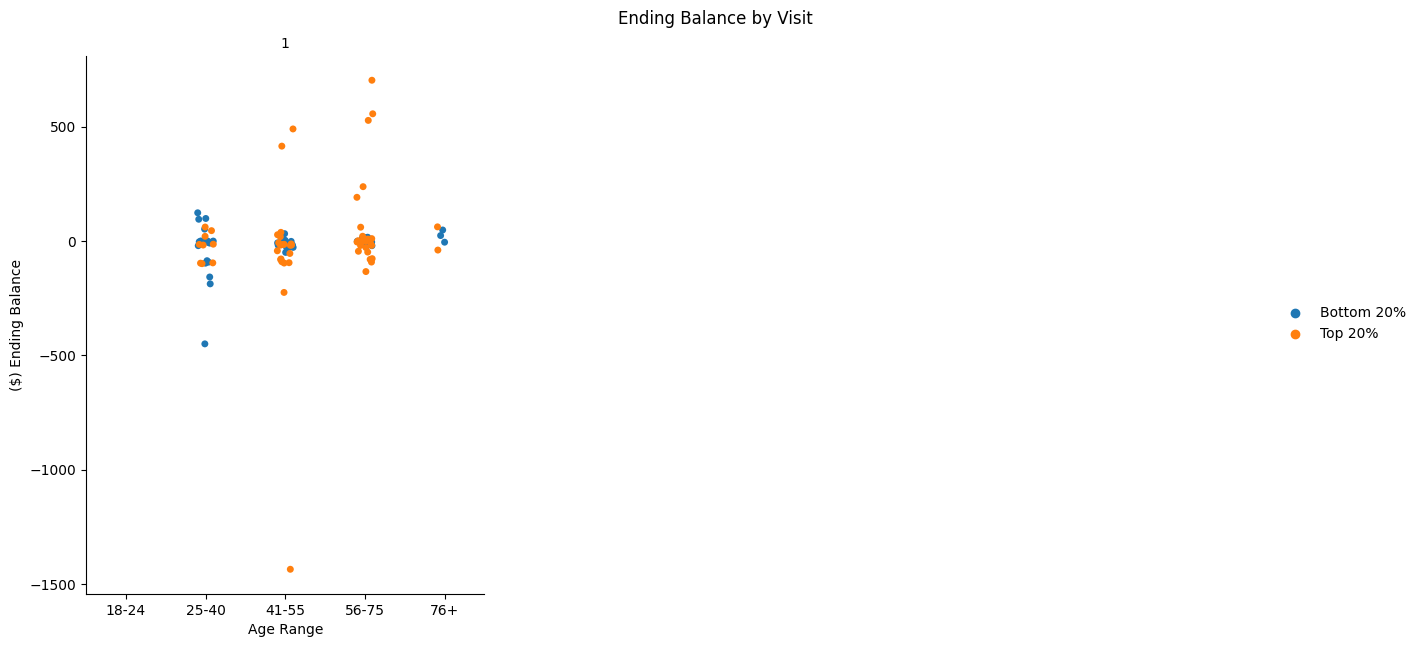

In [14]:
# Outliers - Players who make over 10,000
# Filter DataFrame to include only rows where ending_balance is greater than 10000
df_high_balance_v = df_all_v[df_all_v['ending_balance'] > 10000]

# Get list of unique players in the filtered DataFrame
print('Outlier Players:')
print(df_high_balance_v[['playerkey', 'ending_balance']])

# Filter DataFrame to include only rows where ending_balance is greater than 10000
df_no_outliers_v = df_all_v[df_all_v['ending_balance'] <= 10000]

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_no_outliers_v, col='visit', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['Bottom 20%', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
f.fig.suptitle('Ending Balance by Visit', fontsize=12)
f.fig.set_size_inches(14, 7)

##### Overall Gains/Loses

In [15]:
# Make a dataframe from b_amount_won_lost_each_v
df_bottom_v = b_amount_won_lost_each_v.groupby(['visit', 'gender', 'age_range']).sum().to_frame(name='ending_balance').reset_index()

# Add a column name 'percentile' that is equal to bottom_20
df_bottom_v['percentile'] = 'Bottom 20%'
# print(df_bottom_v)

# Make a dataframe from t_amount_won_lost_each_v
df_top_v = t_amount_won_lost_each_v.groupby(['visit', 'gender', 'age_range']).sum().to_frame(name='ending_balance').reset_index()

# Add a column name 'percentile' that is equal to top_20
df_top_v['percentile'] = 'Top 20%'
# print(df_top_v)

# Combine the data for the top and bottom 20% groups into one DataFrame
combined_data = pd.concat([df_bottom_v, df_top_v], axis=0)

# print(combined_data)

# Print how much females made or lost overall
print(combined_data.groupby(['gender', 'percentile']).sum(numeric_only=True))
# Print how much each females made or lost per visit
print(combined_data.groupby(['visit', 'gender', 'percentile']).sum(numeric_only=True))

# # Save to parquet file
# combined_data.to_parquet('overall_ending_balance_by_visit.parquet')
# print(combined_data)

# # Create the scatter plot
# sns.scatterplot(data=combined_data, x='visit', y='ending_balance', hue='percentile')
# plt.title('Ending Balance by Visit')
# plt.show()

                   visit  ending_balance
gender percentile                       
F      Bottom 20%      5      -59.630001
       Top 20%         5    -1116.820190
M      Bottom 20%      5     -882.929993
       Top 20%         5     1361.430054
                         ending_balance
visit gender percentile                
1     F      Bottom 20%      -59.630001
             Top 20%       -1116.820190
      M      Bottom 20%     -882.929993
             Top 20%        1361.430054


percentile  Bottom 20%      Top 20%
gender                             
F           -59.630001 -1116.820190
M          -882.929993  1361.430054


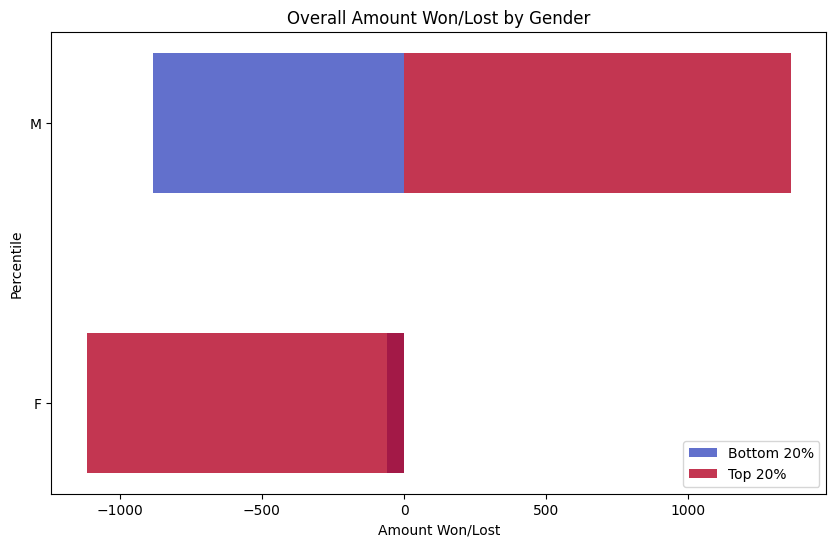

In [16]:
# Create a pivot table to rearrange the data
pivot_table = combined_data.pivot_table(index='gender', columns='percentile', values='ending_balance', aggfunc='sum')

print(pivot_table)
# # Create a diverging bar chart
import matplotlib.pyplot as plt

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Set the data and colors for the bars
data = pivot_table.values
colors = plt.cm.coolwarm(np.linspace(0, 1, data.shape[1]))

# Iterate over the columns and plot each bar
for i, (colname, color) in enumerate(zip(pivot_table.columns, colors)):
    ax.barh(pivot_table.index, data[:, i], height=0.5, color=color, alpha=0.8, label=colname)

# Set the axis labels, title, and legend
ax.set_xlabel('Amount Won/Lost')
ax.set_ylabel('Percentile')
ax.set_title('Overall Amount Won/Lost by Gender')
ax.legend()


# Display the plot
plt.show()



percentile  Bottom 20%      Top 20%
age_range                          
18-24         0.000000     0.000000
25-40      -754.279968  -212.350006
41-55      -212.529999 -1317.210205
56-75       -42.149998  1752.170166
76+          66.400002    22.000000


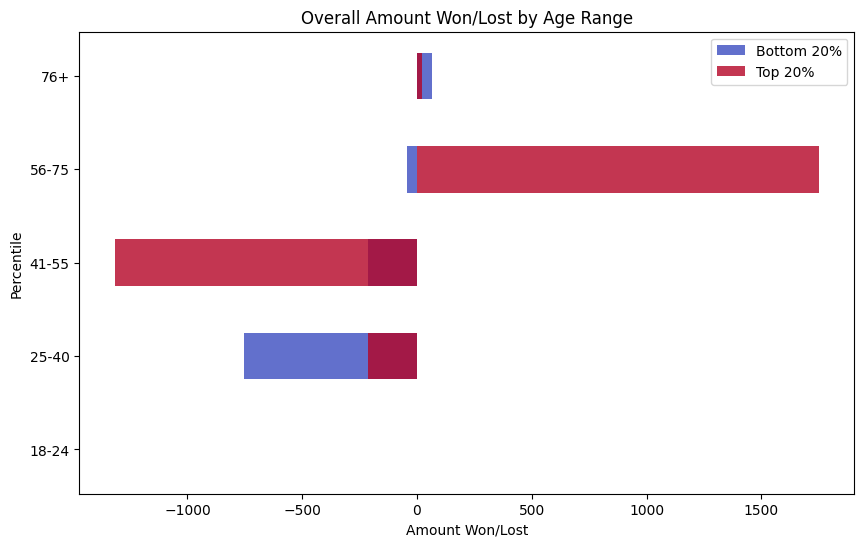

In [17]:
# Create a pivot table to rearrange the data
pivot_table = combined_data.pivot_table(index='age_range', columns='percentile', values='ending_balance', aggfunc='sum')

print(pivot_table)
# # Create a diverging bar chart
import matplotlib.pyplot as plt

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Set the data and colors for the bars
data = pivot_table.values
colors = plt.cm.coolwarm(np.linspace(0, 1, data.shape[1]))

# Iterate over the columns and plot each bar
for i, (colname, color) in enumerate(zip(pivot_table.columns, colors)):
    ax.barh(pivot_table.index, data[:, i], height=0.5, color=color, alpha=0.8, label=colname)

# Set the axis labels, title, and legend
ax.set_xlabel('Amount Won/Lost')
ax.set_ylabel('Percentile')
ax.set_title('Overall Amount Won/Lost by Age Range')
ax.legend()

# Display the plot
plt.show()

##### Per Vist Gains/Loses

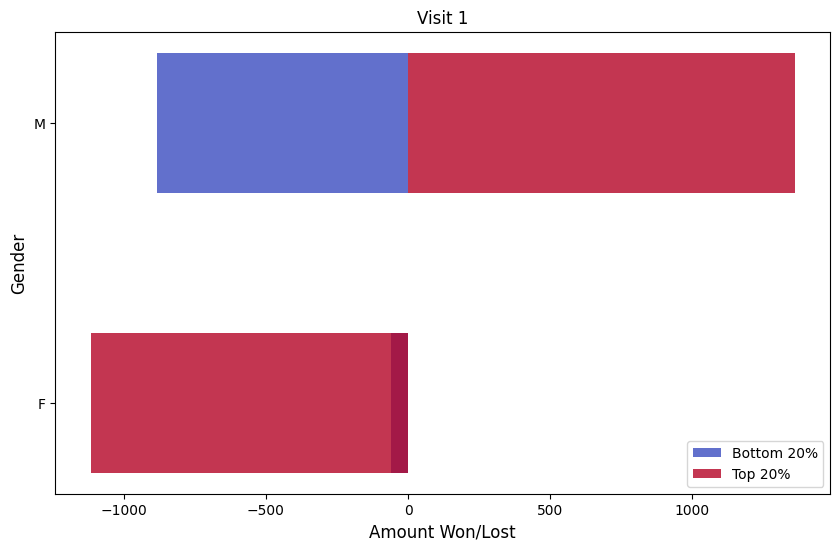

                         ending_balance
visit percentile gender                
1     Bottom 20% F           -59.630001
                 M          -882.929993
      Top 20%    F         -1116.820190
                 M          1361.430054


In [18]:

# Group the data by visit
groups = combined_data.groupby('visit')

# Set up the plot parameters
fig, axs = plt.subplots(nrows=len(groups), figsize=(10, 6*len(groups)))

# Loop over each visit and create a plot for that visit
for i, (visit, group) in enumerate(groups):
    # Pivot the data
    pivot_table = group.pivot_table(values='ending_balance', index='gender', columns='percentile', aggfunc='sum')
    
    # Create the figure and axes objects
    ax = axs[i] if len(groups) > 1 else axs
    
    # Set the data and colors for the bars
    data = pivot_table.values
    colors = plt.cm.coolwarm(np.linspace(0, 1, data.shape[1]))

    # Iterate over the columns and plot each bar
    for j, (colname, color) in enumerate(zip(pivot_table.columns, colors)):
        ax.barh(pivot_table.index, data[:, j], height=0.5, color=color, alpha=0.8, label=colname)

    # Set the axis labels, title, and legend
    ax.set_xlabel('Amount Won/Lost', fontsize=12)
    ax.set_ylabel('Gender', fontsize=12)
    ax.set_title(f'Visit {visit}')
    ax.legend()

# Display the plot
plt.show()

print(combined_data.groupby(['visit', 'percentile', 'gender']).sum(numeric_only=True))

percentile  Bottom 20%      Top 20%
age_range                          
18-24         0.000000     0.000000
25-40      -754.279968  -212.350006
41-55      -212.529999 -1317.210205
56-75       -42.149998  1752.170166
76+          66.400002    22.000000


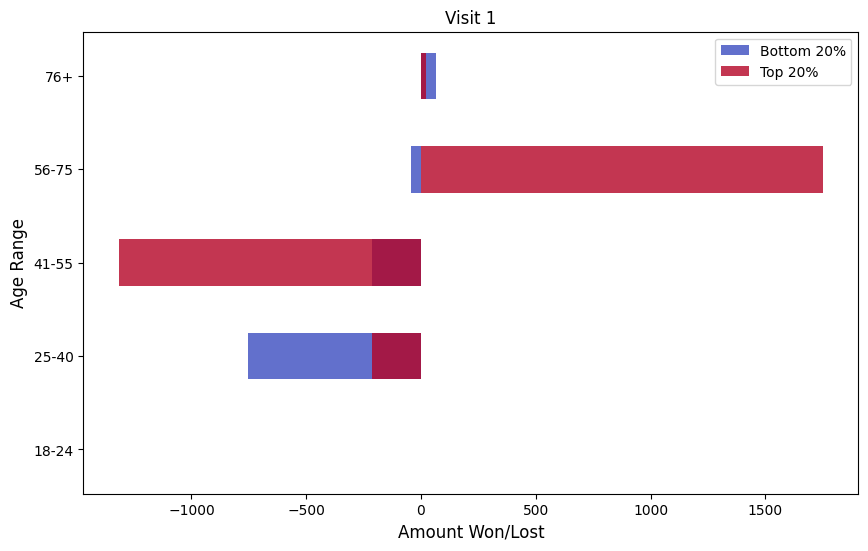

                            ending_balance
visit percentile age_range                
1     Bottom 20% 18-24            0.000000
                 25-40         -754.279968
                 41-55         -212.529999
                 56-75          -42.149998
                 76+             66.400002
      Top 20%    18-24            0.000000
                 25-40         -212.350006
                 41-55        -1317.210205
                 56-75         1752.170166
                 76+             22.000000


In [19]:
# Set up the plot parameters
fig, axs = plt.subplots(nrows=len(groups), figsize=(10, 6*len(groups)))

# Loop over each visit and create a plot for that visit
for i, (visit, group) in enumerate(groups):
    # Pivot the data
    pivot_table = group.pivot_table(values='ending_balance', index='age_range', columns='percentile', aggfunc='sum')
    print(pivot_table)
    # Create the figure and axes objects
    ax = axs[i] if len(groups) > 1 else axs
    
    # Set the data and colors for the bars
    data = pivot_table.values
    colors = plt.cm.coolwarm(np.linspace(0, 1, data.shape[1]))

    # Iterate over the columns and plot each bar
    for j, (colname, color) in enumerate(zip(pivot_table.columns, colors)):
        ax.barh(pivot_table.index, data[:, j], height=0.5, color=color, alpha=0.8, label=colname)

    # Set the axis labels, title, and legend
    ax.set_xlabel('Amount Won/Lost', fontsize=12)
    ax.set_ylabel('Age Range', fontsize=12)
    ax.set_title(f'Visit {visit}')
    ax.legend()
    # # Adjust x and y axis ranges
    # ax.set_xlim([-1000, 1000])

# Display the plot
plt.show()

print(combined_data.groupby(['visit', 'percentile', 'age_range']).sum(numeric_only=True))

#### Per Session

In [20]:
# Group by 'playerkey' and session_time bottom 20%
grouped_b_s = df_bottom_20.groupby(['playerkey', 'gender', 'age_range', 'age_gen', 'session_time'])

# Calculate the amount won or lost by each player
b_amount_won_lost_each_s = grouped_b_s['playercashableamt'].last() - grouped_b_s['playercashableamt'].first()

print('Total amount won or lost in each session bottom 20%:')
print(b_amount_won_lost_each_s.groupby('session_time').sum())
print('-------------------------------------------------------')
print('Total amount won or lost for each gender in bottom 20%:')
print(b_amount_won_lost_each_s.groupby('gender').sum())
print('-------------------------------------------------------')
print('Total amount won or lost for each age range in bottom 20%:')
print(b_amount_won_lost_each_s.groupby('age_range').sum())


Total amount won or lost in each session bottom 20%:
session_time
1   -1040.050049
2      -2.059996
Name: playercashableamt, dtype: float32
-------------------------------------------------------
Total amount won or lost for each gender in bottom 20%:
gender
F   -159.179993
M   -882.929993
Name: playercashableamt, dtype: float32
-------------------------------------------------------
Total amount won or lost for each age range in bottom 20%:
age_range
18-24      0.000000
25-40   -853.780029
41-55   -212.580002
56-75    -42.149998
76+       66.400002
Name: playercashableamt, dtype: float32


In [21]:
# Group by 'playerkey' and session_time top 20%
grouped_t_s = df_top_20.groupby(['playerkey', 'gender', 'age_range', 'age_gen', 'session_time'])

# Calculate the amount won or lost by each player
t_amount_won_lost_each_s = grouped_t_s['playercashableamt'].last() - grouped_t_s['playercashableamt'].first()

print('Total amount won or lost in each session top 20%:')
print(t_amount_won_lost_each_s.groupby('session_time').sum())
print('-------------------------------------------------------')
print('Total amount won or lost for each gender in top 20%:')
print(t_amount_won_lost_each_s.groupby('gender').sum())
print('-------------------------------------------------------')
print('Total amount won or lost for each age range in top 20%:')
print(t_amount_won_lost_each_s.groupby('age_range').sum())

Total amount won or lost in each session top 20%:
session_time
1    40420.839844
2     1756.260010
3       74.440025
4      319.519989
5      313.059998
6       -6.680008
Name: playercashableamt, dtype: float32
-------------------------------------------------------
Total amount won or lost for each gender in top 20%:
gender
F    40506.882812
M     2370.560059
Name: playercashableamt, dtype: float32
-------------------------------------------------------
Total amount won or lost for each age range in top 20%:
age_range
18-24        0.000000
25-40     -476.500000
41-55    41047.507812
56-75     2228.340088
76+         78.089996
Name: playercashableamt, dtype: float32


##### Distribution Ending Balances

Text(0.5, 0.98, 'Ending Balance by Visit')

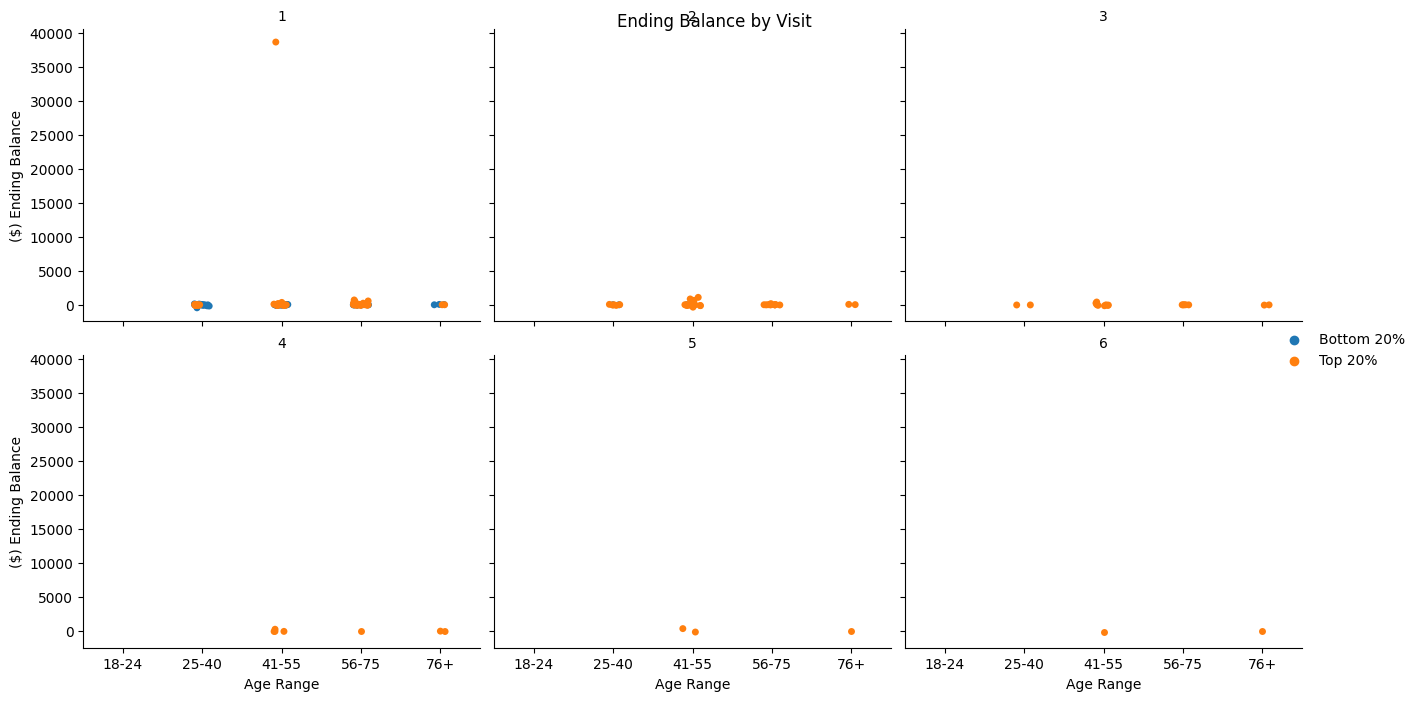

In [22]:
# Create dataframe with 'playerkey', 'visit', and 'ending_balance'
df_all_b_s = b_amount_won_lost_each_s.to_frame(name='ending_balance').reset_index().dropna()
df_all_b_s['percentile'] = 'Bottom 20%'

# Create dataframe with 'playerkey', 'visit', and 'ending_balance'
df_all_t_s = t_amount_won_lost_each_s.to_frame(name='ending_balance').reset_index().dropna()
df_all_t_s['percentile'] = 'Top 20%'

# Concatenate dataframes
df_all_s = pd.concat([df_all_b_s, df_all_t_s])

# Save dataframe to paquet file
df_all_s.to_parquet('per_player_ending_balance_by_session.parquet')

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_all_s, col='session_time', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['Bottom 20%', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
# Set y-axis on a log scale
# f.set(yscale='log')
f.fig.set_size_inches(14, 7)
f.fig.suptitle('Ending Balance by Visit', fontsize=12)


Outlier Players:
       playerkey  ending_balance
11172        264    38614.140625


Text(0.5, 0.98, 'Ending Balance by Visit')

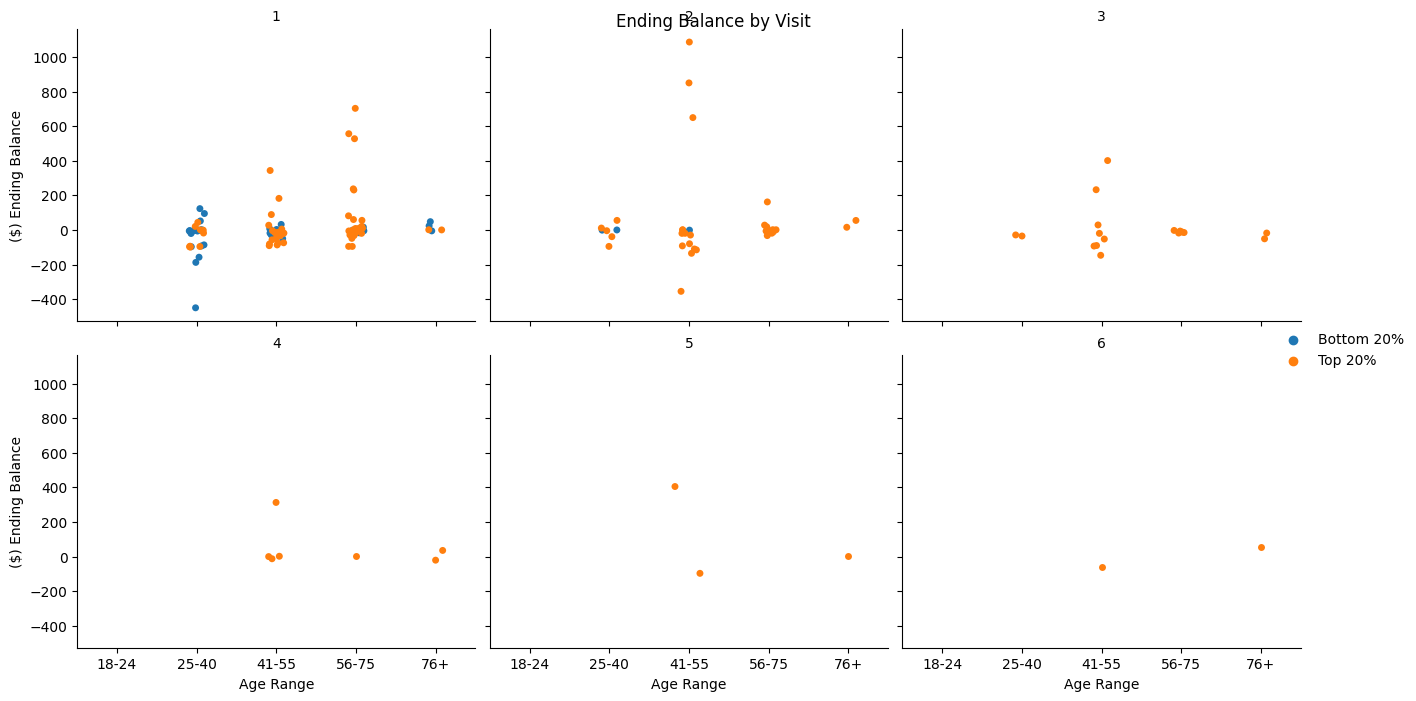

In [23]:
# Outliers - Players who make over 10,000
# Filter DataFrame to include only rows where ending_balance is greater than 10000
df_high_balance_s = df_all_s[df_all_s['ending_balance'] > 10000]

# Get list of unique players in the filtered DataFrame
print('Outlier Players:')
print(df_high_balance_s[['playerkey', 'ending_balance']])

# Filter the data to exclude any balances over 10,000
df_no_outlier_s = df_all_s[df_all_s['ending_balance'] <= 10000]

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_no_outlier_s, col='session_time', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['Bottom 20%', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
# Set y-axis on a log scale
# f.set(yscale='log')
f.fig.set_size_inches(14, 7)
f.fig.suptitle('Ending Balance by Visit', fontsize=12)


##### Overall Gains/Loses

In [24]:
# Make a dataframe from t_amount_won_lost_each_s
df_t_s = t_amount_won_lost_each_s.groupby(['session_time', 'gender', 'age_range']).sum().to_frame(name='ending_balance').reset_index()

# Add a column for percentile
df_t_s['percentile'] = 'Top 20%'
# print(df_t_s)
# Make a dataframe from b_amount_won_lost_each_s
df_b_s = b_amount_won_lost_each_s.groupby(['session_time', 'gender', 'age_range']).sum().to_frame(name='ending_balance').reset_index()

# Add a column for percentile
df_b_s['percentile'] = 'Bottom 20%'
# print(df_b_s)

# Concatenate dataframes
combined_data_s = pd.concat([df_t_s, df_b_s])
# print(combined_data_s)

# Save to parquet file
combined_data_s.to_parquet('overall_ending_balance_by_session.parquet')

# Print how much females made or lost overall
print(combined_data_s.groupby(['gender', 'percentile']).sum(numeric_only=True))
# Print how much each females made or lost per visit
print(combined_data_s.groupby(['session_time', 'gender', 'percentile']).sum(numeric_only=True))




                   session_time  ending_balance
gender percentile                              
F      Bottom 20%            15     -159.180008
       Top 20%              105    40506.878906
M      Bottom 20%            15     -882.929993
       Top 20%              105     2370.560059
                                ending_balance
session_time gender percentile                
1            F      Bottom 20%     -157.120010
                    Top 20%       39262.925781
             M      Bottom 20%     -882.929993
                    Top 20%        1157.910034
2            F      Bottom 20%       -2.059996
                    Top 20%        1343.520020
             M      Bottom 20%        0.000000
                    Top 20%         412.739960
3            F      Top 20%        -199.550003
             M      Top 20%         273.990051
4            F      Top 20%          39.750000
             M      Top 20%         279.769989
5            F      Top 20%           4.860000
       

In [25]:
# Remove outliers
combined_data_s_NO = combined_data_s[combined_data_s['ending_balance'] <= 10000]

# Print how much females made or lost overall
print(combined_data_s_NO.groupby(['gender', 'percentile']).sum(numeric_only=True))
# Print how much each females made or lost per visit
print(combined_data_s_NO.groupby(['session_time', 'gender', 'percentile']).sum(numeric_only=True))

                   session_time  ending_balance
gender percentile                              
F      Bottom 20%            15     -159.180008
       Top 20%              104     2246.409912
M      Bottom 20%            15     -882.929993
       Top 20%              105     2370.560059
                                ending_balance
session_time gender percentile                
1            F      Bottom 20%     -157.120010
                    Top 20%        1002.460083
             M      Bottom 20%     -882.929993
                    Top 20%        1157.910034
2            F      Bottom 20%       -2.059996
                    Top 20%        1343.520020
             M      Bottom 20%        0.000000
                    Top 20%         412.739960
3            F      Top 20%        -199.550003
             M      Top 20%         273.990051
4            F      Top 20%          39.750000
             M      Top 20%         279.769989
5            F      Top 20%           4.860000
       

percentile  Bottom 20%      Top 20%
gender                             
F          -159.180008  2246.409912
M          -882.929993  2370.560059


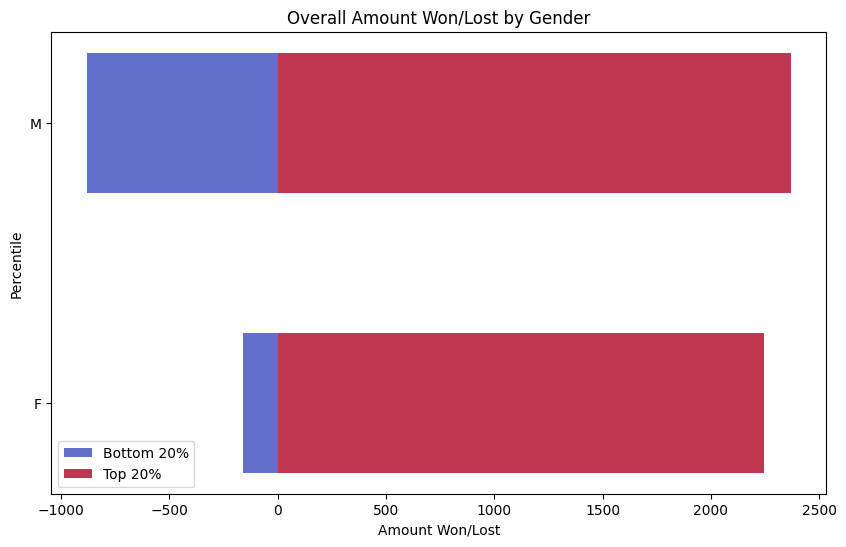

In [26]:
# Create a pivot table to rearrange the data
pivot_table = combined_data_s_NO.pivot_table(index='gender', columns='percentile', values='ending_balance', aggfunc='sum')

print(pivot_table)
# # Create a diverging bar chart
import matplotlib.pyplot as plt

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Set the data and colors for the bars
data = pivot_table.values
colors = plt.cm.coolwarm(np.linspace(0, 1, data.shape[1]))

# Iterate over the columns and plot each bar
for i, (colname, color) in enumerate(zip(pivot_table.columns, colors)):
    ax.barh(pivot_table.index, data[:, i], height=0.5, color=color, alpha=0.8, label=colname)

# Set the axis labels, title, and legend
ax.set_xlabel('Amount Won/Lost')
ax.set_ylabel('Percentile')
ax.set_title('Overall Amount Won/Lost by Gender')
ax.legend()


# Display the plot
plt.show()

percentile  Bottom 20%      Top 20%
age_range                          
18-24         0.000000     0.000000
25-40      -853.779968  -476.500000
41-55      -212.580002  2787.040039
56-75       -42.149998  2228.340088
76+          66.400002    78.089996


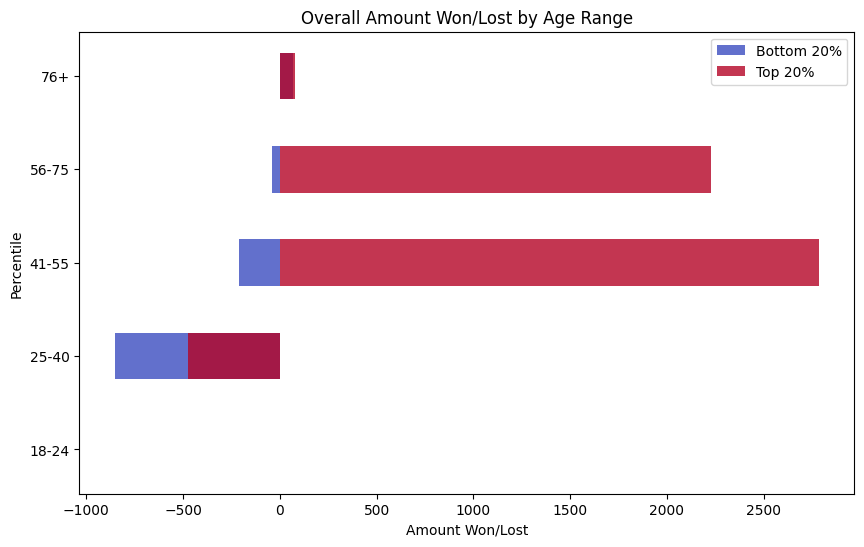

In [27]:
# Create a pivot table to rearrange the data
pivot_table = combined_data_s_NO.pivot_table(index='age_range', columns='percentile', values='ending_balance', aggfunc='sum')

print(pivot_table)
# # Create a diverging bar chart
import matplotlib.pyplot as plt

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Set the data and colors for the bars
data = pivot_table.values
colors = plt.cm.coolwarm(np.linspace(0, 1, data.shape[1]))

# Iterate over the columns and plot each bar
for i, (colname, color) in enumerate(zip(pivot_table.columns, colors)):
    ax.barh(pivot_table.index, data[:, i], height=0.5, color=color, alpha=0.8, label=colname)

# Set the axis labels, title, and legend
ax.set_xlabel('Amount Won/Lost')
ax.set_ylabel('Percentile')
ax.set_title('Overall Amount Won/Lost by Age Range')
ax.legend()

# Display the plot
plt.show()

##### Per Sessions Gains/Loses

percentile  Bottom 20%      Top 20%
gender                             
F          -157.120010  1002.460083
M          -882.929993  1157.910034
percentile  Bottom 20%     Top 20%
gender                            
F            -2.059996  1343.52002
M             0.000000   412.73996
percentile     Top 20%
gender                
F          -199.550003
M           273.990051
percentile     Top 20%
gender                
F            39.750000
M           279.769989
percentile     Top 20%
gender                
F             4.860000
M           308.200012
percentile    Top 20%
gender               
F           55.369995
M          -62.050003


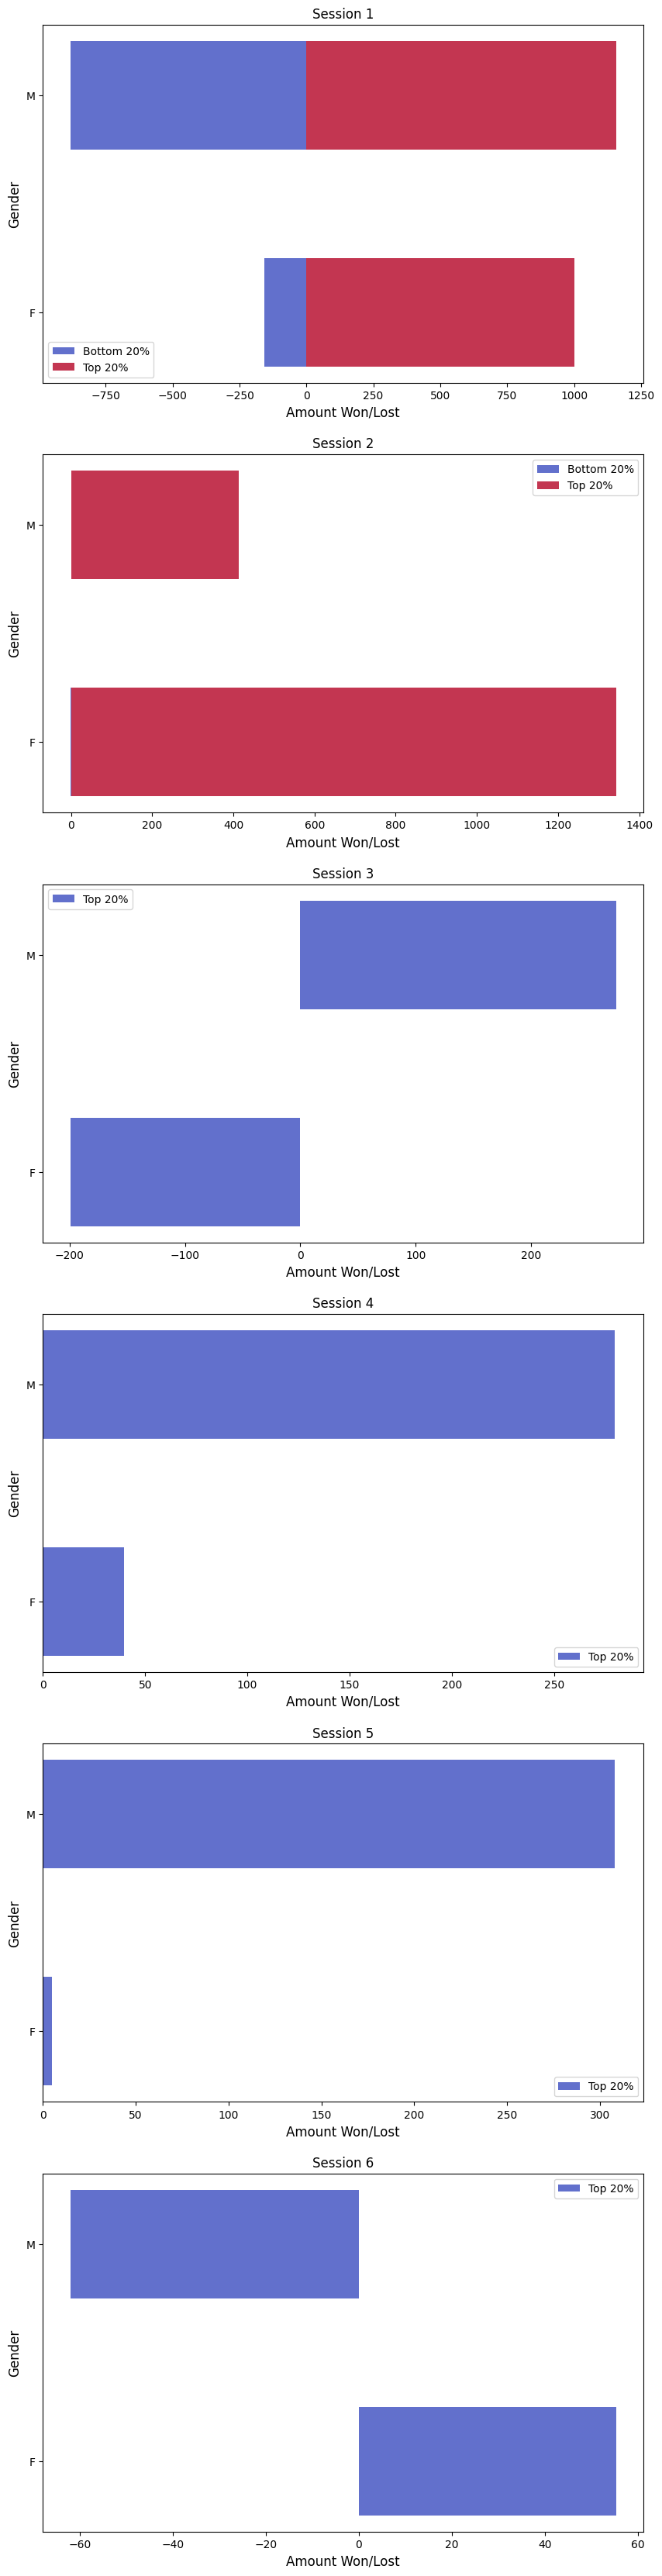

In [31]:
# Group the data by visit
groups = combined_data_s_NO.groupby('session_time')

# Set up the plot parameters
fig, axs = plt.subplots(nrows=len(groups), figsize=(10, 7*len(groups)))

# Loop over each visit and create a plot for that visit
for i, (visit, group) in enumerate(groups):
    # Pivot the data
    pivot_table = group.pivot_table(values='ending_balance', index='gender', columns='percentile', aggfunc='sum')
    print(pivot_table)
    
    # Create the figure and axes objects
    ax = axs[i] if len(groups) > 1 else axs
    
    # Set the data and colors for the bars
    data = pivot_table.values
    colors = plt.cm.coolwarm(np.linspace(0, 1, data.shape[1]))

    # Iterate over the columns and plot each bar
    for j, (colname, color) in enumerate(zip(pivot_table.columns, colors)):
        ax.barh(pivot_table.index, data[:, j], height=0.5, color=color, alpha=0.8, label=colname)

    # Set the axis labels, title, and legend
    ax.set_xlabel('Amount Won/Lost', fontsize=12)
    ax.set_ylabel('Gender', fontsize=12)
    ax.set_title(f'Session {visit}')
    ax.legend()

# Display the plot
plt.show()

percentile  Bottom 20%      Top 20%
age_range                          
18-24         0.000000     0.000000
25-40      -852.659973  -340.589996
41-55      -211.639999   345.670013
56-75       -42.149998  2153.870117
76+          66.400002     1.420001
percentile  Bottom 20%      Top 20%
age_range                          
18-24         0.000000     0.000000
25-40        -1.119995   -72.059998
41-55        -0.940001  1631.609863
56-75         0.000000   126.130005
76+           0.000000    70.580002
percentile     Top 20%
age_range             
18-24         0.000000
25-40       -63.849998
41-55       261.200043
56-75       -53.959999
76+         -68.949997
percentile     Top 20%
age_range             
18-24         0.000000
25-40         0.000000
41-55       302.410004
56-75         2.300001
76+          14.810001
percentile     Top 20%
age_range             
18-24         0.000000
25-40         0.000000
41-55       308.200012
56-75         0.000000
76+           4.860000
percentile   

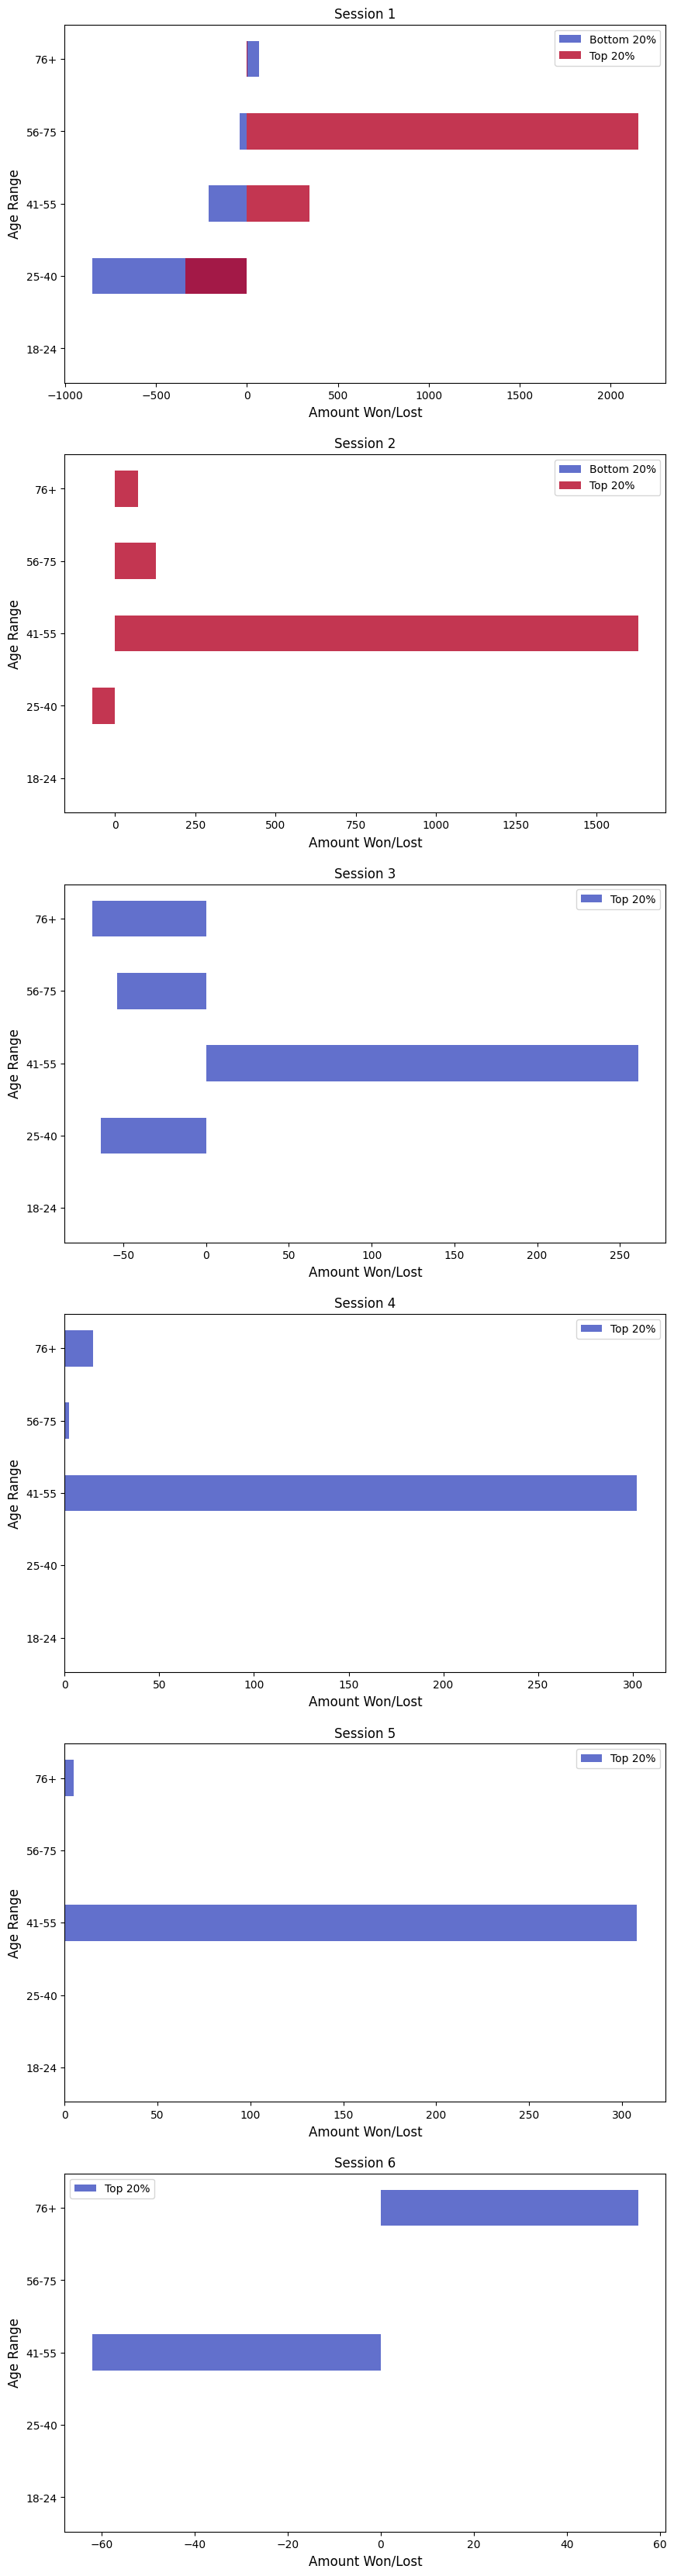

In [32]:
# Set up the plot parameters
fig, axs = plt.subplots(nrows=len(groups), figsize=(10, 7*len(groups)))

# Loop over each visit and create a plot for that visit
for i, (visit, group) in enumerate(groups):
    # Pivot the data
    pivot_table = group.pivot_table(values='ending_balance', index='age_range', columns='percentile', aggfunc='sum')
    print(pivot_table)
    # Create the figure and axes objects
    ax = axs[i] if len(groups) > 1 else axs
    
    # Set the data and colors for the bars
    data = pivot_table.values
    colors = plt.cm.coolwarm(np.linspace(0, 1, data.shape[1]))

    # Iterate over the columns and plot each bar
    for j, (colname, color) in enumerate(zip(pivot_table.columns, colors)):
        ax.barh(pivot_table.index, data[:, j], height=0.5, color=color, alpha=0.8, label=colname)

    # Set the axis labels, title, and legend
    ax.set_xlabel('Amount Won/Lost', fontsize=12)
    ax.set_ylabel('Age Range', fontsize=12)
    ax.set_title(f'Session {visit}')
    ax.legend()

# Display the plot
plt.show()